# week3 授業前課題2 住宅情報の分析

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [24]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

アイオワ州エイムズの住宅1460件の、ほぼ全ての側面を説明する79の説明変数（建てた年や広さ、リフォーム、ガレージ、立地など）が書かれたデータセット
各パラメータの詳細についてはdata_description.txtに書かれている

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### 3-1 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

train.csvはfloat型のデータが3個、int型のデータが35個、データ型が43個ある<br>
MSSubClassのようにカテゴリデータがint型の場合もある<br>

（メモ）<br>
data>sammary　から、163列中、stringが96、intが61、IDが3、その他が3とあるが、全てのファイルの合計でもあり
LotFrontageのように基本は数値にもかかわらず、欠損値にNAとあるのでStringになっているのであまり参考にならない

### 3-2 今回の目的変数はどの列か確認する。

In [26]:
# 目的変数は販売価格なので下記のどの方法でも取得できる
#df.loc[:, ["SalePrice"]]
#df.iloc[:, 80:]
df.iloc[:, -1:]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


### 3-3 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。
- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。<br>
インストールや使い方に関しては以下のページをご覧ください。

- 欠損値が何パーセント含まれるかを確認する。
- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。

In [28]:
# %matplotlib inline
# msno.matrix(df.iloc[:, :40])

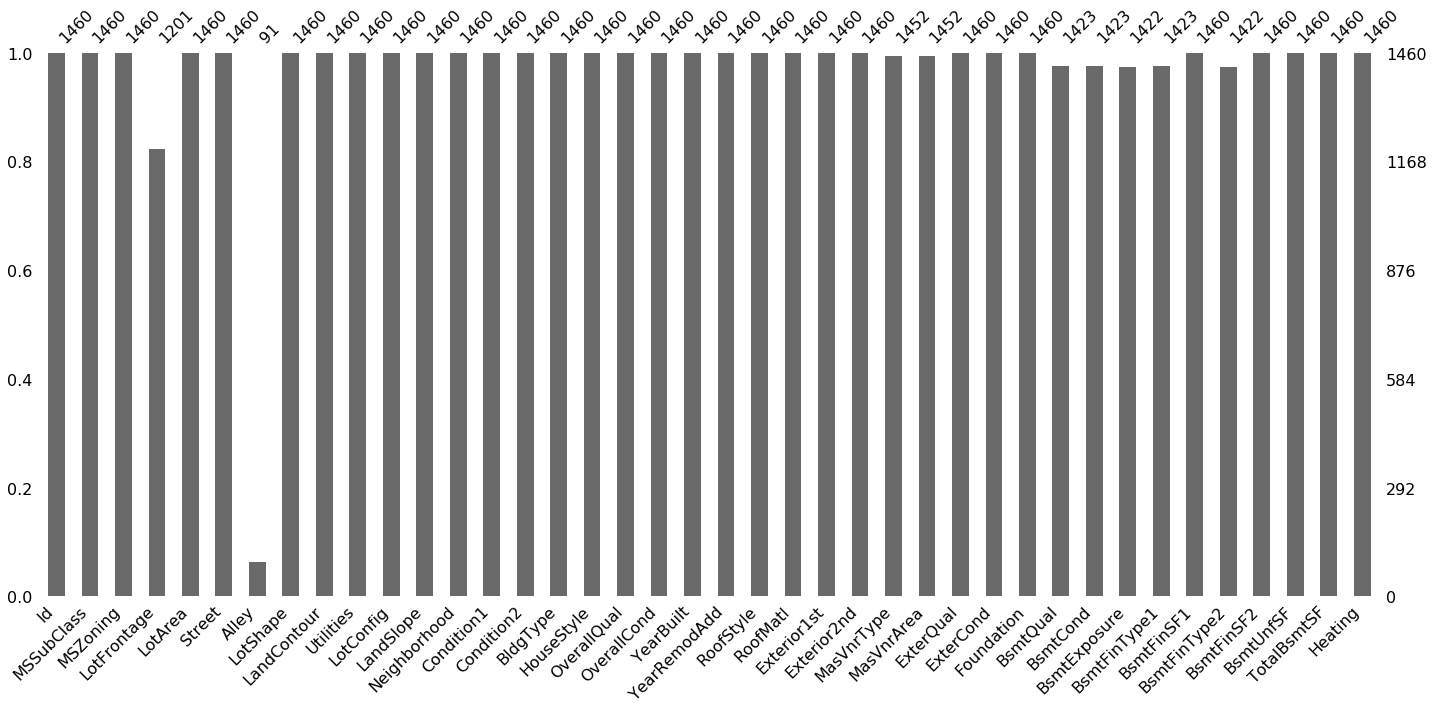

In [29]:
msno.bar(df.iloc[:, :40])

In [30]:
#msno.heatmap(df)

In [31]:
def missing_rate(df, t):
    total = df[t].isnull().sum()
    percent = round(total/len(df[t])*100, 2)
    return pd.DataFrame([[total, percent]], columns=["total", "percent"], index=[t])

In [32]:
# missing_rate(df,"LotFrontage")
# missing_rate(df,"Alley")

In [34]:
%matplotlib inline
#欠損値のパーセント表示と欠損値の数(長すぎて確認できないので40ずつ)
df_missing = pd.DataFrame()
for col_name in df.iloc[:, :40]:
    df_missing = pd.concat([df_missing, missing_rate(df, col_name)], axis=0)
    #if df_missing.iloc[-1,0] >= 5:
        #print(df_missing.iloc[-1,0])
        # 削除する
        #df.drop(columns=col_name, inplace=True)
df_missing

,total,percent
Id,0,0.00
MSSubClass,0,0.00
MSZoning,0,0.00
LotFrontage,259,17.74
LotArea,0,0.00
Street,0,0.00
Alley,1369,93.77
LotShape,0,0.00
LandContour,0,0.00
Utilities,0,0.00


In [36]:
df_missing = pd.DataFrame()
for col_name in df.iloc[:, 40:-1]:
    df_missing = pd.concat([df_missing, missing_rate(df, col_name)], axis=0)
    #if df_missing.iloc[-1,0] >= 5:
        #print(df_missing.iloc[-1,0], col_name)
        # 削除する
        #df.drop(columns=col_name, inplace=True)
df_missing

,total,percent
HeatingQC,0,0.00
CentralAir,0,0.00
Electrical,1,0.07
1stFlrSF,0,0.00
2ndFlrSF,0,0.00
LowQualFinSF,0,0.00
GrLivArea,0,0.00
BsmtFullBath,0,0.00
BsmtHalfBath,0,0.00
FullBath,0,0.00


In [44]:
%matplotlib inline
df_delNaN = df.copy()
#欠損値5個以上の列(特徴量)を削除する
df_missing = pd.DataFrame()
for col_name in df:
    df_missing = pd.concat([df_missing, missing_rate(df, col_name)], axis=0)
    if df_missing.iloc[-1,0] >= 5:
        print(df_missing.iloc[-1,0])
        # 削除する
        df_delNaN.drop(columns=col_name, inplace=True)
df_delNaN

259
1369
8
8
37
37
38
37
38
690
81
81
81
81
81
1453
1179
1406


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [46]:
# 新たに作ったdf_delNaNから削除されていることを確認
df_delNaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [47]:
# オリジナルのdfは削除されていないことを確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [64]:
# 欠損値のある行(サンプル)を削除
for label in df_delNaN.itertuples(name=None):
    if df_delNaN.loc[label[0]].isnull().sum() > 0:
        print(label)
        # 削除する
        df_delNaN.drop(index=label[0], inplace=True)

(1379, 1380, 80, 'RL', 9735, 'Pave', 'Reg', 'Lvl', 'AllPub', 'Inside', 'Gtl', 'Timber', 'Norm', 'Norm', '1Fam', 'SLvl', 5, 5, 2006, 2007, 'Gable', 'CompShg', 'VinylSd', 'VinylSd', 'TA', 'TA', 'PConc', 0, 0, 384, 384, 'GasA', 'Gd', 'Y', nan, 754, 640, 0, 1394, 0, 0, 2, 1, 3, 1, 'Gd', 7, 'Typ', 0, 2, 400, 'Y', 100, 0, 0, 0, 0, 0, 0, 5, 2008, 'WD', 'Normal', 167500)


In [67]:
#削除されていることを確認
#df_delNaN.iloc[1379]
#df_delNaN.info()

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。
- 尖度
- 歪度

- <b>尖度（せんど）</b><br>
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。<br>
サンプルサイズをn、各データ$x_i$(i:1,2,...,n)の平均値をμ、標準偏差をσとすると
$$
\frac{n(n + 1)}{(n - 1)(n - 2)(n - 3)}\sum_{i=1}^{n}\bigl(\frac{x_i - \mu}{\sigma}\bigr)^4 - \frac{3(n - 1)^2}{(n - 2)(n - 3)}
$$
正規分布より「尖った分布」は正の値、「扁平な分布」は負の値を取り、「正規分布」の場合は0となる


- <b>歪度（わいど）</b><br>
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標。<br>
サンプルサイズをn、各データ$x_i$(i:1,2,...,n)の平均値をμ、標準偏差をσとすると
$$
\frac{n}{(n - 1)(n - 2)}\sum_{i=1}^{n}\bigl(\frac{x_i - \mu}{\sigma}\bigr)^3
$$
「左に偏った分布」は正の値。「右に偏った分布」は負の値を取り、「左右対称の分布」は0になる

## 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

尖度：1.882876 です
歪度：6.536282 です


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


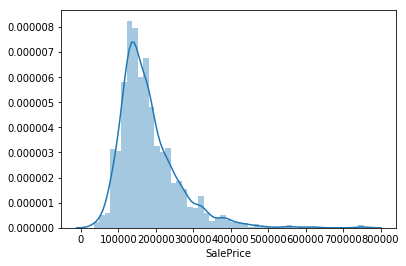

In [74]:
sns.distplot(df["SalePrice"])
print("尖度：%f です" % df["SalePrice"].skew())
print("歪度：%f です" % df["SalePrice"].kurt())

### 6-2 目的変数に対して対数変換を行う。
説明変数・・・広さやガレージなど（何かの原因になっている変数）<br>
目的変数・・・住宅価格（原因を受けて発生した結果）

尖度：0.121335 です
歪度：0.809532 です


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


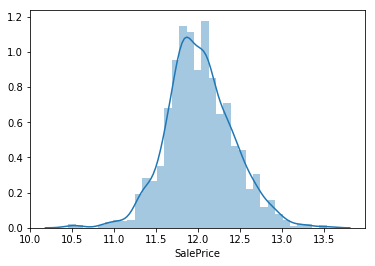

In [76]:
sns.distplot(np.log(df["SalePrice"]))
print("尖度：%f です" % np.log(df["SalePrice"]).skew())
print("歪度：%f です" % np.log(df["SalePrice"]).kurt())

### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

尖度、歪度ともに対数変換をすることで、正規分布（0）に近くなった<br>
対数変換とは、特徴量のスケールが大きい時はその範囲を縮小し、小さい時は拡大する<br>
対数変換をした目的変数で計算をする場合、予測結果を元のスケールに戻すことが必要<br>

尖度：0.121318 です
歪度：0.806928 です


/Users/arisa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


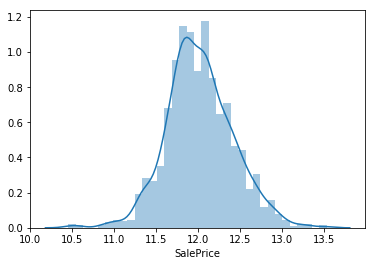

In [78]:
# 欠損値を削除したデータでも出力してみる　１つしか削除していないので結果はあまり変わらない
sns.distplot(np.log(df_delNaN["SalePrice"]))
print("尖度：%f です" % np.log(df_delNaN["SalePrice"]).skew())
print("歪度：%f です" % np.log(df_delNaN["SalePrice"]).kurt())

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

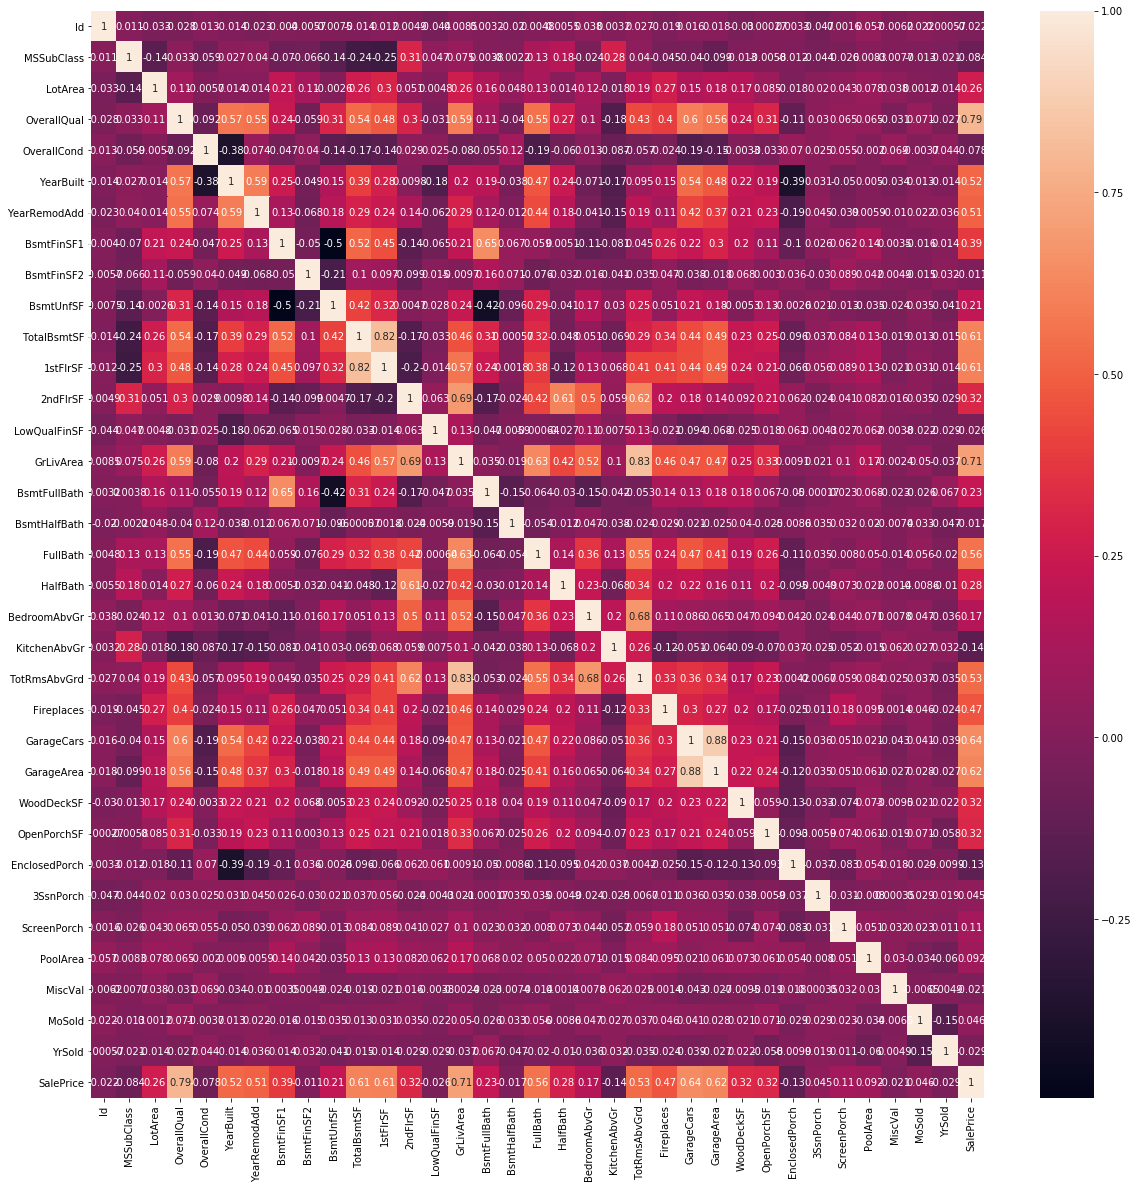

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(df_delNaN.corr(), annot=True)

In [85]:
coef = df_delNaN.corr()
coef

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,...,-0.029716,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,...,-0.012598,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,...,0.171701,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.239000,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,...,-0.003318,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,...,0.224946,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,...,0.205773,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,...,0.204403,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,...,0.067909,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,...,-0.005304,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446


In [87]:
coef["SalePrice"].sort_values()

KitchenAbvGr    -0.135935
EnclosedPorch   -0.128627
MSSubClass      -0.084230
OverallCond     -0.077924
YrSold          -0.028907
LowQualFinSF    -0.025620
Id              -0.021756
MiscVal         -0.021200
BsmtHalfBath    -0.016873
BsmtFinSF2      -0.011412
3SsnPorch        0.044571
MoSold           0.046380
PoolArea         0.092397
ScreenPorch      0.111419
BedroomAbvGr     0.168235
BsmtUnfSF        0.214446
BsmtFullBath     0.227082
LotArea          0.263837
HalfBath         0.284400
OpenPorchSF      0.315831
2ndFlrSF         0.319464
WoodDeckSF       0.324422
BsmtFinSF1       0.386436
Fireplaces       0.466968
YearRemodAdd     0.507430
YearBuilt        0.523273
TotRmsAbvGrd     0.533779
FullBath         0.560881
1stFlrSF         0.605968
TotalBsmtSF      0.613905
GarageArea       0.623423
GarageCars       0.640473
GrLivArea        0.708618
OverallQual      0.791069
SalePrice        1.000000
Name: SalePrice, dtype: float64

### 目的変数との相関の高い特徴量10個を選ぶ
YearRemodAdd     0.507430
YearBuilt        0.523273
TotRmsAbvGrd     0.533779
FullBath         0.560881
1stFlrSF         0.605968
TotalBsmtSF      0.613905
GarageArea       0.623423
GarageCars       0.640473
GrLivArea        0.708618
OverallQual      0.791069

In [102]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df_delNaN["SalePrice","YearRemodAdd","YearBuilt"].corr(), annot=True)
df_10 = df_delNaN.loc[:,["YearRemodAdd","YearBuilt","TotRmsAbvGrd", "FullBath", 
                 "1stFlrSF", "TotalBsmtSF", "GarageArea", "GarageCars", "GrLivArea", "OverallQual", "SalePrice"]]

In [103]:
df_10

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000
5,1995,1993,5,1,796,796,480,2,1362,5,143000
6,2005,2004,7,2,1694,1686,636,2,1694,8,307000
7,1973,1973,7,2,1107,1107,484,2,2090,7,200000
8,1950,1931,8,2,1022,952,468,2,1774,7,129900
9,1950,1939,5,1,1077,991,205,1,1077,5,118000


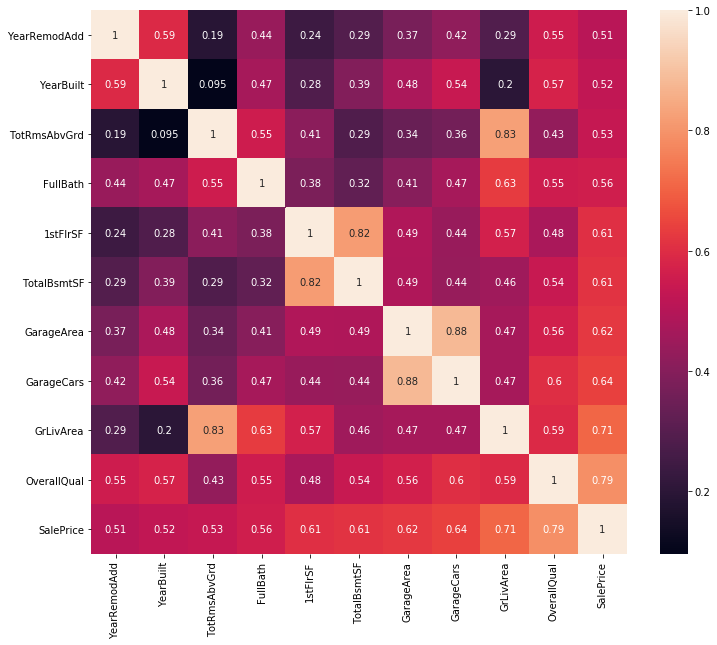

In [104]:
plt.figure(figsize=(12,10))
sns.heatmap(df_10.corr(), annot=True)

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- YearRemodAdd     0.507430<br>
リフォーム（改造）した年<br>
- YearBuilt        0.523273<br>
建築年<br>
- TotRmsAbvGrd     0.533779  <br>
部屋の数<br>
- FullBath         0.560881<br>
バスルームの数<br>
- 1stFlrSF         0.605968<br>
1階の広さ（平方フィート）<br>
- TotalBsmtSF      0.613905<br>
地下室の広さ（平方フィート）<br>
- GarageArea       0.623423<br>
ガレージのサイズ（平方フィート）<br>
- GarageCars       0.640473<br>
ガレージに車が何台入るか<br>
- GrLivArea        0.708618<br>
リビング（地上）の広さ（平方フィート）<br>
- OverallQual      0.791069<br>
家の全体的な素材と仕上げを1~10の数値で評価。10が最高評価のVery Excellent 1が最低評価のVery Poor<br>



### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


GarageAreaとGarageCars（ガレージのサイズ：ガレージに車が何台入るか）<br>
TotRmsAbvGrdとGrLivArea（部屋の数：リビング（地上）の広さ）<br>
TotalBsmtSFと1stFlrSF（地下室の広さ：1階の広さ）<br>